# Experiment 1-1
# Linear Regression with 5 features


In [1]:

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import *


In [2]:
student_df = pd.read_csv("StudentsPerformance.csv")

# student_df.head()
# student_df.info()

## 8:1:1

In [6]:
features = student_df[['11', '22', '25', '26', '30']]  # 5 features
# label = student_df['32']  # Target variable
label = student_df['GRADE']  # Target variable

from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)
X_temp, X_test, y_temp, y_test = train_test_split(features, label, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.11, random_state=42)
# 8:1:1 = train:val:test

## 6:2:2


In [25]:
features = student_df[['11', '22', '25', '26', '30']]  # 5 features
label = student_df['GRADE']  # Target variable

from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)
X_temp, X_test, y_temp, y_test = train_test_split(features, label, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)
# 6:2: 2 = train:val:test

## 7:1.5:1.5

In [21]:
features = student_df[['11', '22', '25', '26', '30']]  # 5 features
label = student_df['GRADE']  # Target variable

from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)
X_temp, X_test, y_temp, y_test = train_test_split(features, label, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.18, random_state=42)
# 7:1.8:1.8 = train:val:test

In [7]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)


LinearRegression()

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pred = LR.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, pred)}")
print(f"MAE: {mean_absolute_error(y_test, pred)}")
print(f"R-squared: {r2_score(y_test, pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, pred))}")


MSE: 4.9191897117399375
MAE: 1.973805364128641
R-squared: -0.0007393174877809994
RMSE: 2.217924640680999


In [39]:
new_data = pd.DataFrame({
    '11': [1, 6],  # Example values
    '22': [2, 1],
    '25': [2, 3],
    '26': [2, 3],
    '30': [3, 5]
})

predictions = LR.predict(new_data)
print("Predictions:", predictions)


Predictions: [3.0462742 5.3224713]


### Data Visualization

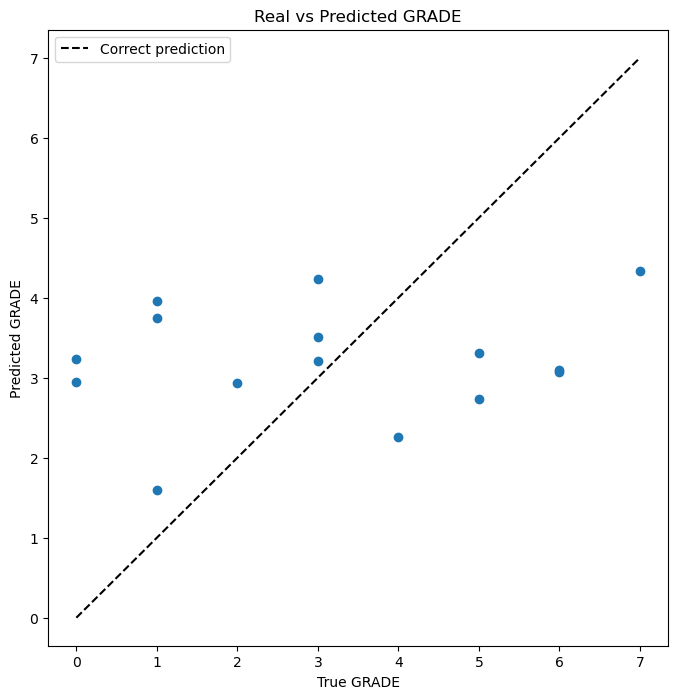

In [40]:
plt.figure(figsize=(8, 8))

plt.scatter(y_test, pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label="Correct prediction")

plt.xlabel('True GRADE')
plt.ylabel('Predicted GRADE')
plt.title("Real vs Predicted GRADE")

plt.legend()

---
---
---


# Experiment 1-2
# correlation with target
# Linear Regression with correlation-based features


In [10]:
from sklearn.preprocessing import StandardScaler

In [41]:
# 1. First, let's check correlation of ALL numeric columns with your target
numeric_columns = student_df.select_dtypes(include=[np.number]).columns
correlations = student_df[numeric_columns].corr()['GRADE'].sort_values(ascending=False)
print("Top correlations with target:")
# print(correlations)

# 2. Select only the most correlated features (|correlation| > 0.1)
better_features = correlations[abs(correlations) > 0.1].index.tolist()
better_features = ['2', '29', '30', '18', '5', 'GRADE', '22','9','8', '20', '21']
better_features.remove('GRADE')  # Remove target from features

print("\nSelected features based on correlation:")
print(better_features)

# 3. Try model with better features
X = student_df[better_features]
y = student_df['11']



Top correlations with target:

Selected features based on correlation:
['2', '29', '30', '18', '5', '22', '9', '8', '20', '21']


## 8:1:1

In [15]:
# 4. Split and scale
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.11, random_state=42)
# 8:1:1 = train:val:test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

LR = LinearRegression()
LR.fit(X_train_scaled, y_train)
pred = LR.predict(X_test_scaled)

print(f"MSE: {mean_squared_error(y_test, pred)}")
print(f"MAE: {mean_absolute_error(y_test, pred)}")
print("\nRandom Forest Metrics:")
print(f"R-squared: {r2_score(y_test, pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, pred))}")


MSE: 1.4587383479538927
MAE: 1.0712557381671342

Random Forest Metrics:
R-squared: 0.06223963345821182
RMSE: 1.207782409192108


## 6:2:2

In [19]:
# 4. Split and scale
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)
# 6:2:2 = train:val:test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

LR = LinearRegression()
LR.fit(X_train_scaled, y_train)
pred = LR.predict(X_test_scaled)

print(f"MSE: {mean_squared_error(y_test, pred)}")
print(f"MAE: {mean_absolute_error(y_test, pred)}")
print("\nRandom Forest Metrics:")
print(f"R-squared: {r2_score(y_test, pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, pred))}")


MSE: 1.8241211473935053
MAE: 1.1516542621936212

Random Forest Metrics:
R-squared: -0.03654451686347149
RMSE: 1.3506002914976383


## 7:1.5:1.5

In [44]:
# 4. Split and scale
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.18, random_state=42)
# 7:1.8:1.8 = train:val:test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

LR = LinearRegression()
LR.fit(X_train_scaled, y_train)
pred = LR.predict(X_test_scaled)

print(f"MSE: {mean_squared_error(y_test, pred)}")
print(f"MAE: {mean_absolute_error(y_test, pred)}")
print("\nRandom Forest Metrics:")
print(f"R-squared: {r2_score(y_test, pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, pred))}")


MSE: 1.2996484668957942
MAE: 1.003063806798446

Random Forest Metrics:
R-squared: 0.11653109834611752
RMSE: 1.140021257212248


# Predictions

In [ ]:
new_data = pd.DataFrame({
    '2': [1, 6],  # Example values
    '29': [2, 5],
    '30': [2, 5],
    '18': [2, 3],
    '5': [1, 2],
    '22': [2, 1],
    '9': [1, 2],
    '8': [1, 4],
    '20': [1, 2],
    '21': [2, 1]
})

predictions = LR.predict(new_data)
print("Predictions:", predictions)


Predictions: [2.77716048 4.51118259]


### Data Visualization

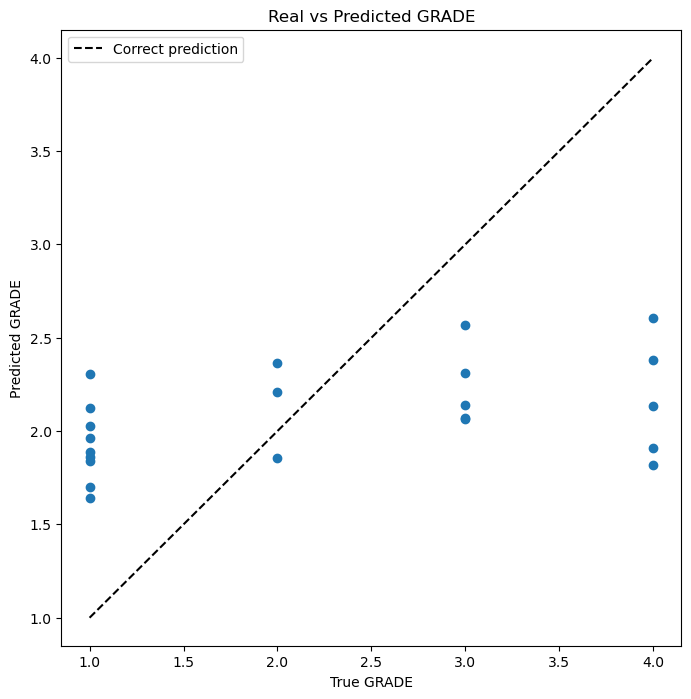

In [45]:
plt.figure(figsize=(8, 8))

plt.scatter(y_test, pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label="Correct prediction")

plt.xlabel('True GRADE')
plt.ylabel('Predicted GRADE')
plt.title("Real vs Predicted GRADE")

plt.legend()

---
---